# Импорт необходимых библиотек

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [257]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [270]:
warnings.filterwarnings('ignore')

In [271]:
topMessages = df.groupby("Message")["Category"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
Message,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
Okie,4,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
Ok,4,ham
Ok.,4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st ""Ur Lovely Friendship""... good morning dear",4,ham


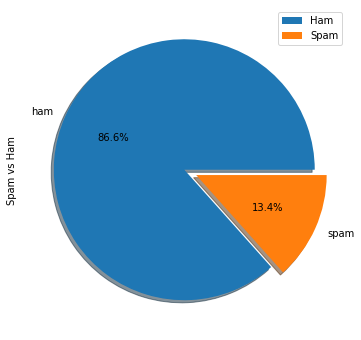

In [272]:
df["Category"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [274]:
df.isna().sum()

Category    0
Message     0
dtype: int64

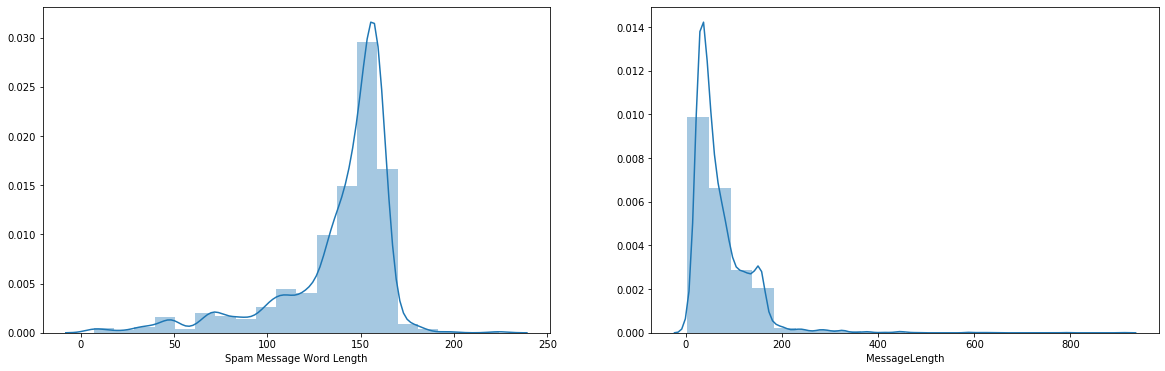

In [281]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(df[df["Category"] == "spam"]["MessageLength"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(df[df["Category"] == "ham"]["MessageLength"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()


In [261]:
len(df[df['Category'] == 'spam']['Message'][9])

154

In [262]:
len(df[df['Category'] == 'spam']['Message'][5])

148

In [268]:
len(df[df['Category'] == 'ham']['Message'][3])

49

In [265]:
len(df[df['Category'] == 'ham']['Message'][1])

29

In [159]:
stemmer = SnowballStemmer("english")
def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

df["Message"] = df["Message"].apply(cleanText)
df.head(n = 10)    

,Category,Message,MessageLength
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah dont think goe usf live around though,61
5,spam,freemsg hey darl 3 week word back id like fun ...,148
6,ham,even brother like speak treat like aid patent,77
7,ham,per request mell mell oru minnaminungint nurun...,160
8,spam,winner valu network custom select receivea â£9...,158
9,spam,mobil 11 month u r entitl updat latest colour ...,154


In [160]:
def encodeCategory(cat):
    if cat == "spam":
        return 1
    else:
        return 0
        
df["Category"] = df["Category"].apply(encodeCategory)

In [161]:
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features_tf = vec.fit_transform(df["Message"])
print(features_tf.shape)
X_train, X_test, y_train, y_test = train_test_split(features_tf, df["Category"], stratify = df["Category"], test_size = 0.2)

(5572, 7981)


# Изменение алгоритма предварительной обработки данных

In [162]:
cv=CountVectorizer(encoding = 'latin-1',strip_accents = "unicode", stop_words = "english")
features_cv=cv.fit_transform(df["Message"])
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_cv, df["Category"], stratify = df["Category"], test_size = 0.2)

# Мультиномиальный байесовский классификатор


In [176]:
%%time 
gaussianNb = MultinomialNB()
gaussianNb.fit(X_train, y_train)

y_pred_gnb = gaussianNb.predict(X_test)

print("The accuracy of our model: {}".format(gaussianNb.score(X_test,y_test)))
print(classification_report(y_test, y_pred_gnb))

The accuracy of our model: 0.9695067264573991
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Wall time: 9.53 ms


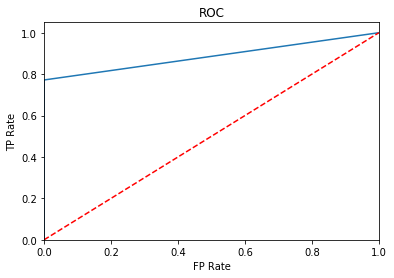

In [165]:
# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

# Мультиномиальный Байес при другой предварительной обработке данных

In [192]:
%%time
gaussianNb_cv = MultinomialNB()
gaussianNb_cv.fit(X_train2, y_train2)

y_pred_gnb_cv = gaussianNb_cv.predict(X_test2)

print(fbeta_score(y_test2, y_pred_gnb_cv, beta = 0.5))
print("the accuracy of our model: {}".format(gaussianNb_cv.score(X_test2,y_test2)))
print(classification_report(y_test2, y_pred_gnb_cv))

0.9120310478654592
the accuracy of our model: 0.979372197309417
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       966
           1       0.90      0.95      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Wall time: 11 ms


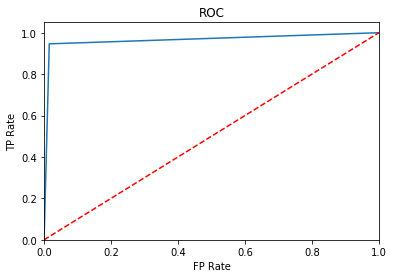

In [193]:
# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_gnb_cv)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

# Наивный байесовский классификатор

In [180]:
%%time
nb = GaussianNB()
nb.fit(X_train.toarray(),y_train)
y_pred_nb = nb.predict(X_test.toarray())
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       966
           1       0.49      0.87      0.63       149

    accuracy                           0.86      1115
   macro avg       0.73      0.87      0.77      1115
weighted avg       0.91      0.86      0.88      1115

Wall time: 1.41 s


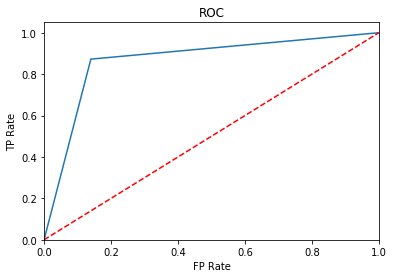

In [181]:
# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

# Метод ближайших соседей

In [178]:
%%time
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train.toarray(),y_train)
y_pred_knn = knn.predict(X_test.toarray())
print("The accuracy of our model: {}".format(knn.score(X_test.toarray(),y_test)))
print(classification_report(y_test, y_pred_knn))

The accuracy of our model: 0.9165919282511211
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       0.98      0.38      0.55       149

    accuracy                           0.92      1115
   macro avg       0.95      0.69      0.75      1115
weighted avg       0.92      0.92      0.90      1115

Wall time: 2min 25s


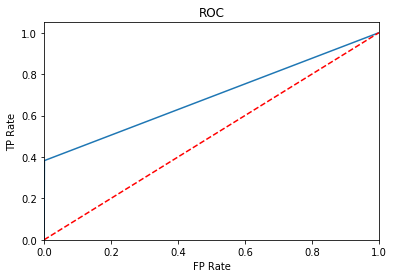

In [179]:
# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

# Метод опорных векторов с линейным ядром


In [184]:
%%time
lsvc = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
lsvc.fit(X_train.toarray(), y_train)
y_pred_lsvc = lsvc.predict(X_test.toarray())
print(classification_report(y_test, y_pred_lsvc))
print('Linear SVC accuracy is: ',lsvc.score(X_test.toarray(),y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.92      0.91      0.92       149

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Linear SVC accuracy is:  0.9775784753363229
Wall time: 55.8 s


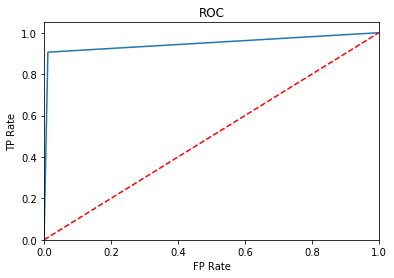

In [174]:
# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lsvc)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

# Метод опорных векторов с линейным ядром при другой предварительной обработке данных

In [195]:
%%time
mod_lsvc_cv = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
mod_lsvc_cv.fit(X_train2.toarray(), y_train2)
y_pred_lsvc_cv = mod_lsvc_cv.predict(X_test2.toarray())
print(classification_report(y_test2, y_pred_lsvc_cv))
print('Linear SVC accuracy is: ',mod_lsvc_cv.score(X_test2.toarray(),y_test2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Linear SVC accuracy is:  0.9811659192825112
Wall time: 49.6 s


# Метод опорных векторов с гауссовым ядром

In [185]:
%%time
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train.toarray(), y_train)
y_pred_svc = svc.predict(X_test.toarray())
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       1.00      0.55      0.71       149

    accuracy                           0.94      1115
   macro avg       0.97      0.78      0.84      1115
weighted avg       0.94      0.94      0.93      1115

Wall time: 2min 17s


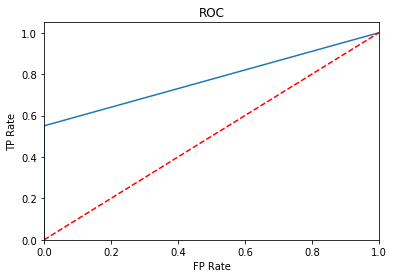

In [186]:
# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

# Метод опорных векторов с гауссовым ядром при другой предварительной обработке данных

In [197]:
%%time
modsvc_cv = make_pipeline(StandardScaler(), SVC(gamma='auto'))
modsvc_cv.fit(X_train2.toarray(), y_train2)
y_predsvc_cv = modsvc_cv.predict(X_test2.toarray())
print(classification_report(y_test2, y_predsvc_cv))
print(' SVC accuracy is: ',modsvc_cv.score(X_test2.toarray(),y_test2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       1.00      0.60      0.75       149

    accuracy                           0.95      1115
   macro avg       0.97      0.80      0.86      1115
weighted avg       0.95      0.95      0.94      1115

Wall time: 2min 15s


# Случайный лес

In [187]:
%%time
rf = RandomForestClassifier(max_depth=2, random_state=0, )
rf.fit(X_train.toarray(), y_train)
y_pred_rf = rf.predict(X_test.toarray())
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

Wall time: 1.34 s


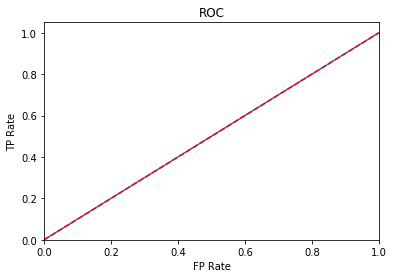

In [188]:
# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

# Логистическая регрессия

In [189]:
%%time
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.97      0.64      0.77       149

    accuracy                           0.95      1115
   macro avg       0.96      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115

Wall time: 65.2 ms


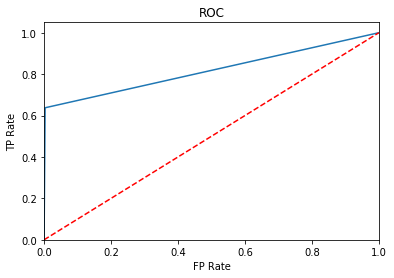

In [190]:
# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

# Многослойный перцептрон


In [182]:
%%time
neur = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_neur = neur.predict(X_test)
neur.score(X_test, y_test)

Wall time: 1min 14s


0.97847533632287

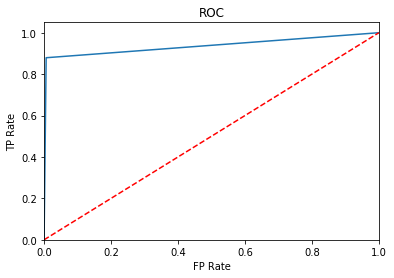

In [183]:
# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_neur)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

# Поиск оптимальных гиперпараметров 

In [191]:
%%time
lSVC_gs =LinearSVC(random_state=0, tol=1e-5)
parameter = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'square_hinge'],
'multi_class':['ovr','crammer_singer']}
lSVC_gs = GridSearchCV(lSVC_gs, parameter, n_jobs=-1, cv=5)
lSVC_gs.fit(X_train.toarray(), y_train)
print('Best parameters found:\n', lSVC_gs.best_params_)
y_pred_gs = lSVC_gs.predict(X_test)
print('Results on the test set:')
print(classification_report(y_test, y_pred_gs))
print('Linear SVC accuracy is: ',lSVC_gs.score(X_test.toarray(),y_test))

Best parameters found:
 {'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}
Results on the test set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.90      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Linear SVC accuracy is:  0.9820627802690582
Wall time: 16.7 s


# Поиск оптимальных гиперпараметров при другой предварительной обработке данных

In [199]:
%%time
lSVC_gs_cv =LinearSVC(random_state=0, tol=1e-5)
parameter = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'square_hinge'],
'multi_class':['ovr','crammer_singer']}
lSVC_gs_cv = GridSearchCV(lSVC_gs_cv, parameter, n_jobs=-1, cv=5)
lSVC_gs_cv.fit(X_train2.toarray(), y_train2)
print('Best parameters found:\n', lSVC_gs_cv.best_params_)
y_pred_gs_cv = lSVC_gs_cv.predict(X_test2)
print('Results on the test set:')
print(classification_report(y_test2, y_pred_gs_cv))
print('Linear SVC accuracy is: ',lSVC_gs_cv.score(X_test2.toarray(),y_test2))

Best parameters found:
 {'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}
Results on the test set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Linear SVC accuracy is:  0.9802690582959641
Wall time: 8.04 s
